## Biased Random-Key Genetic Algorithm

__Placement Procedure__

In [1]:
import math
import time
import random
import numpy as np
import pandas as pd
import concurrent.futures
from model import PlacementProcedure
from model import BRKGA

import matplotlib.pyplot as plt

__Evolutionary Process__

In [2]:
inputs = {
    'p': [188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 145, 145, 145, 145, 145],
    'q': [28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 80, 80, 80, 80, 80 ],
    'r': [58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96],
    'L': [610, 610, 610, 610],
    'W': [244, 244, 244, 244],
    'H': [259, 259, 259, 259]
}

inputs = {'v':list(zip(inputs['p'], inputs['q'], inputs['r'])), 'V':list(zip(inputs['L'], inputs['W'], inputs['H']))}
print('number of boxes:',len(inputs['v']))


number of boxes: 65


In [3]:
start_time = time.time()

#inputs = generateInputs(75, 20, (600, 250, 250))

model = BRKGA(inputs, num_generations = 100, num_individuals=70, num_elites = 10, num_mutants = 7, eliteCProb = 0.7)
model.fit(patient = 15,verbose = True)
print('used bins:',model.used_bins)
print('time:',time.time() - start_time)


Initial Population:
  ->  shape: (70, 130)
  ->  Best Fitness: 2.2104304173640372
Generation : 0  	(Best Fitness: 1.5587424603549302 )
Generation : 1  	(Best Fitness: 1.5587424603549302 )
Generation : 2  	(Best Fitness: 1.5587424603549302 )
Generation : 3  	(Best Fitness: 1.5587424603549302 )
Generation : 4  	(Best Fitness: 1.5587424603549302 )
Generation : 5  	(Best Fitness: 1.5587424603549302 )
Generation : 6  	(Best Fitness: 1.5587424603549302 )
Generation : 7  	(Best Fitness: 1.5587424603549302 )
Generation : 8  	(Best Fitness: 1.5587424603549302 )
Generation : 9  	(Best Fitness: 1.5587424603549302 )
Generation : 10  	(Best Fitness: 1.5587424603549302 )
Generation : 11  	(Best Fitness: 1.5587424603549302 )
Generation : 12  	(Best Fitness: 1.5587424603549302 )
Generation : 13  	(Best Fitness: 1.5587424603549302 )
Generation : 14  	(Best Fitness: 1.5587424603549302 )
Generation : 15  	(Best Fitness: 1.5587424603549302 )
Early stop at iter 16 (timeout)
used bins: 1
time: 213.18479466

In [4]:
inputs['solution'] = model.solution
decoder = PlacementProcedure(inputs, model.solution)
print('fitness:',decoder.evaluate())

fitness: 1.5587424603549302


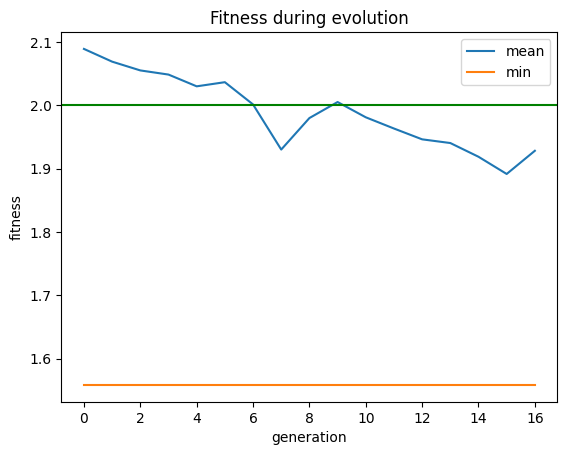

In [5]:
def plot_history(history, tick = 2):
    for target in ['mean', 'min']:
        plt.plot(history[target], label = target)
    plt.title('Fitness during evolution')
    plt.ylabel('fitness')
    plt.xlabel('generation')
    plt.xticks(np.arange(0, len(history['min']), tick))
    plt.legend()
    # h-line for integer
    for i in np.arange(math.ceil(min(history['min'])), int(max(history['mean']))+1):
        plt.axhline(y = i, color = 'g', linestyle = '-') 
    plt.show()

plot_history(model.history)


Container 0 :
Box 0 overlapped with box 1.
Box 0 overlapped with box 2.
Box 0 overlapped with box 3.
Box 0 overlapped with box 4.
Box 0 overlapped with box 5.
Box 0 overlapped with box 6.
Box 0 overlapped with box 7.
Box 0 overlapped with box 8.
Box 0 overlapped with box 9.
Box 0 overlapped with box 10.
Box 0 overlapped with box 11.
Box 0 overlapped with box 12.
Box 0 overlapped with box 13.
Box 0 overlapped with box 14.
Box 0 overlapped with box 15.
Box 0 overlapped with box 16.
Box 0 overlapped with box 17.
Box 0 overlapped with box 18.
Box 0 overlapped with box 19.
Box 0 overlapped with box 20.
Box 0 overlapped with box 21.
Box 0 overlapped with box 22.
Box 0 overlapped with box 23.
Box 0 overlapped with box 24.
Box 0 overlapped with box 25.
Box 0 overlapped with box 26.
Box 0 overlapped with box 27.
Box 0 overlapped with box 28.
Box 0 overlapped with box 29.
Box 0 overlapped with box 30.
Box 0 overlapped with box 31.
Box 0 overlapped with box 32.
Box 0 overlapped with box 33.
Box 0

FileNotFoundError: [Errno 2] No such file or directory: '../resources/exported.png'

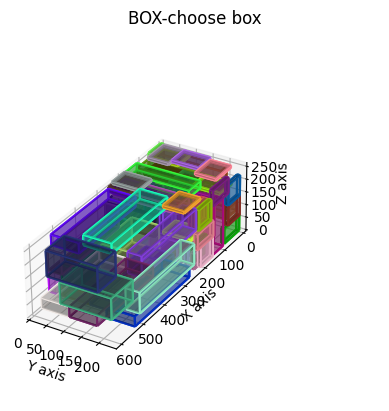

In [6]:
from plot import plot_3D

V = (610, 244, 259)
def draw(decoder):
    for i in range(decoder.num_opend_bins):
        container = plot_3D(V=V)
        for box in decoder.Bins[i].load_items:
            container.add_box(box[0], box[1], mode = 'EMS')
        print('Container',i, ':')
        container.findOverlapping()
        container.show()
        
draw(decoder)